THỰC HÀNH PHÂN TÍCH DỮ LIỆU - BÀI 01
MÔ TẢ DỮ LIỆU BẰNG ĐỒ THỊ - BIỂU ĐỒ

In [1]:
#Nhập các thư viện cần thiết
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

NHẬP DỮ LIỆU

In [2]:
#Đọc file microbiome.csv vào data frame có tên là mb_df
mb_df = pd.read_csv("C:\\Users\\acer\\Documents\\microbiome.csv")
mb_df.head()

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305
1,Firmicutes,2,136,4182
2,Firmicutes,3,1174,703
3,Firmicutes,4,408,3946
4,Firmicutes,5,831,8605


In [3]:
mb_df.tail()

,Taxon,Patient,Tissue,Stool
70,Other,11,203,6
71,Other,12,392,6
72,Other,13,28,25
73,Other,14,12,22
74,Other,15,305,32


Kiểm tra kích thước tập dữ liệu

In [4]:
mb_df.head(15)

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305
1,Firmicutes,2,136,4182
2,Firmicutes,3,1174,703
3,Firmicutes,4,408,3946
4,Firmicutes,5,831,8605
5,Firmicutes,6,693,50
6,Firmicutes,7,718,717
7,Firmicutes,8,173,33
8,Firmicutes,9,228,80
9,Firmicutes,10,162,3196


In [5]:
mb_df.shape

(75, 4)

TRÍCH DỮ LIỆU TỪ DATA FRAME

In [13]:
du_lieu_dinh_tinh = mb_df["Taxon"]
du_lieu_dinh_tinh[:5]

0    Firmicutes
1    Firmicutes
2    Firmicutes
3    Firmicutes
4    Firmicutes
Name: Taxon, dtype: object

In [14]:
du_lieu_dinh_luong = mb_df["Patient"]
du_lieu_dinh_luong[-5:]

70    11
71    12
72    13
73    14
74    15
Name: Patient, dtype: int64

In [15]:
taxon_series = mb_df.Taxon.copy()
taxon_series[:5]

0    Firmicutes
1    Firmicutes
2    Firmicutes
3    Firmicutes
4    Firmicutes
Name: Taxon, dtype: object

In [16]:
tissue_series = mb_df.Tissue.copy()
tissue_series[:5]

0     632
1     136
2    1174
3     408
4     831
Name: Tissue, dtype: int64

In [17]:
taxon_summary = pd.Series(mb_df.Taxon).value_counts()
taxon_summary

Bacteroidetes     15
Firmicutes        15
Actinobacteria    15
Other             15
Proteobacteria    15
Name: Taxon, dtype: int64

In [18]:
taxon_summary = taxon_series.value_counts()
taxon_summary

Bacteroidetes     15
Firmicutes        15
Actinobacteria    15
Other             15
Proteobacteria    15
Name: Taxon, dtype: int64

In [19]:
taxon_summary.index

Index(['Bacteroidetes', 'Firmicutes', 'Actinobacteria', 'Other',
       'Proteobacteria'],
      dtype='object')

In [20]:
taxon_summary.values

array([15, 15, 15, 15, 15], dtype=int64)

VẼ BIỂU ĐỒ CHO DỮ LIỆU ĐỊNH TÍNH

1 - BIỂU ĐỒ HÌNH CỘT

<AxesSubplot:>

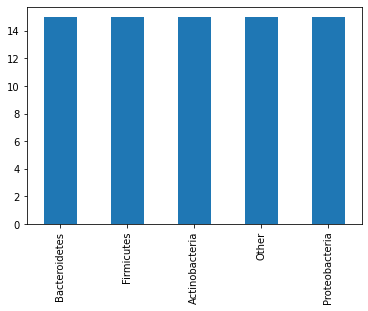

In [21]:
taxon_summary.plot(kind='bar')

<AxesSubplot:>

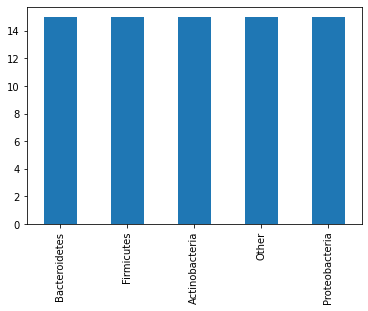

In [22]:
mb_df["Taxon"].value_counts().plot(kind='bar')

Bài tập nâng cao:

(1) Bạn hãy vẽ bar graph có giá trị của từng cột phía trên đỉnh của mỗi bar.

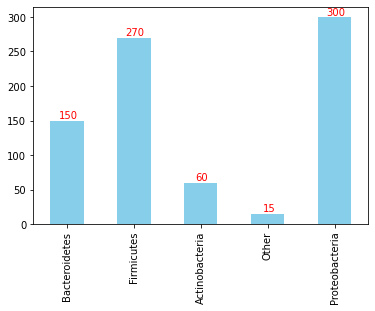

In [34]:
count = np.asarray(taxon_summary)
ind= range(len(taxon_summary))
#Vẽ bar graph
taxon_summary.plot(kind='bar', color='skyblue')
taxonsummary= range(len(taxon_summary))
for x, y in zip(ind,count):
    plt.text(x+0.02, y+0.05, '%d' % y, ha='center', va= 'bottom', color = '#FF0000')

XÂY DỰNG PARETO DIAGRAM

Do dữ liệu ở đây phân bố đồng đều nên chúng ta thử thay đổi 1 ít để tạo pareto có hiệu ứng phù hợp hơn

In [24]:
taxon_summary['Bacteroidetes'] = 150
taxon_summary['Firmicutes'] = 270
taxon_summary['Proteobacteria'] = 300
taxon_summary['Actinobacteria'] = 60
taxon_summary

Bacteroidetes     150
Firmicutes        270
Actinobacteria     60
Other              15
Proteobacteria    300
Name: Taxon, dtype: int64

In [28]:
count = np.asarray(taxon_summary)
print(count)

[150 270  60  15 300]


<AxesSubplot:>

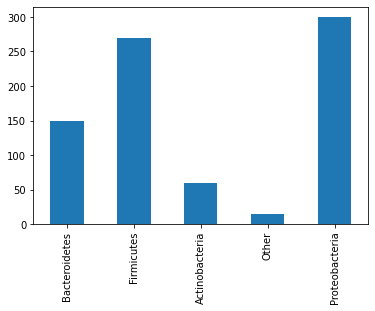

In [29]:
#Vẽ bar graph
taxon_summary.plot(kind='bar')

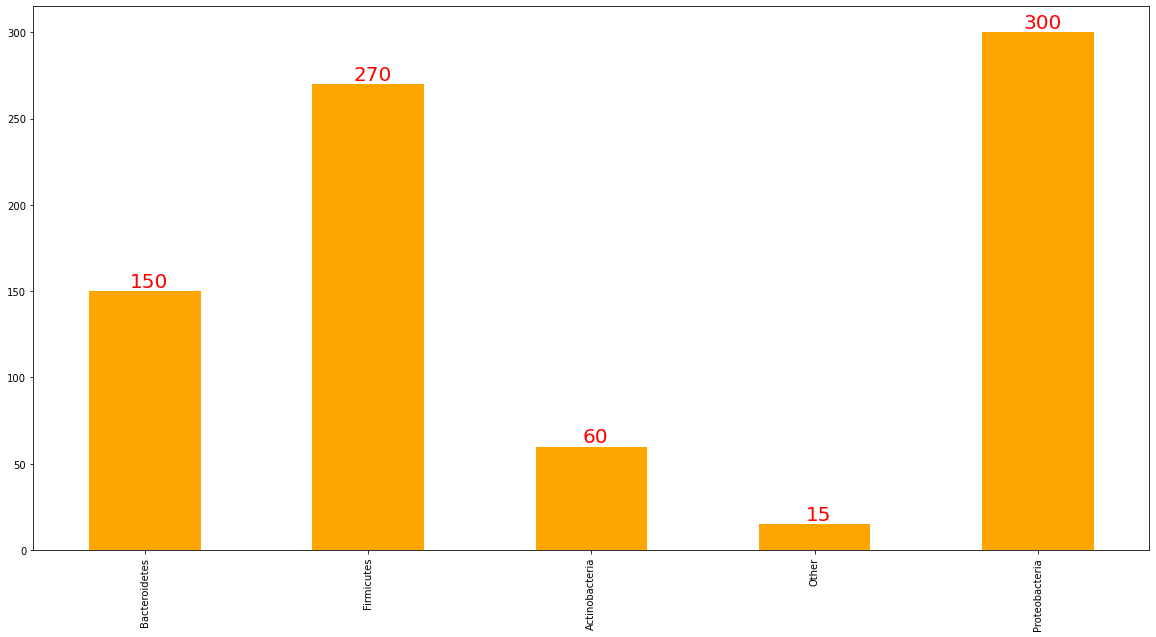

In [32]:
ind= range(len(taxon_summary))
plt.figure(figsize=(20,10))
#Vẽ bar graph
taxon_summary.plot(kind='bar', color='orange')
taxonsummary= range(len(taxon_summary))
for x, y in zip(ind,count):
    plt.text(x+0.02, y+0.05, '%d' % y, ha='center', va= 'bottom', color="r", fontsize=20)

In [17]:
#Vẽ pareto
#Bước 1 - sắp xếp giảm dần
taxon_summary.sort_values(ascending= False)

Proteobacteria    300
Firmicutes        270
Bacteroidetes     150
Actinobacteria     60
Other              15
Name: Taxon, dtype: int64

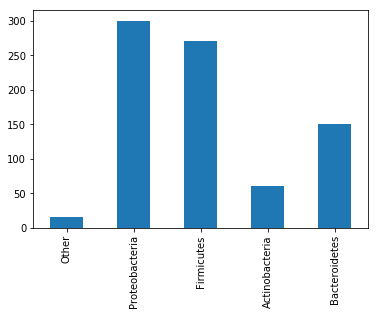

In [18]:
#Bước 2 - Vẽ pareto
taxon_summary.plot(kind='bar')

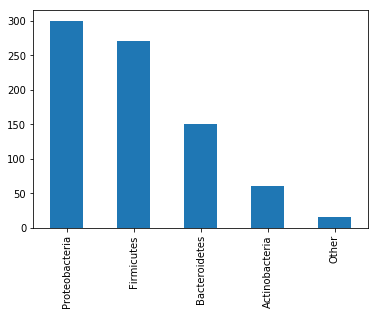

In [19]:
#Lưu ý: Kết quả sắp xếp phải được lưu lại
taxon_pareto = taxon_summary.sort_values(ascending= False)
taxon_pareto.plot(kind = 'bar')

BÀI TẬP NÂNG CAO

VẼ BIỂU ĐỒ NẰM NGANG

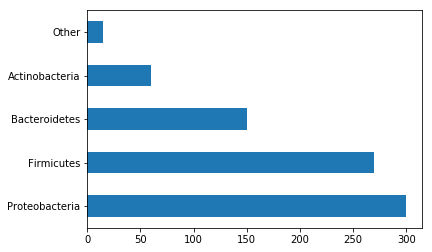

In [20]:
taxon_pareto.plot(kind = 'barh')

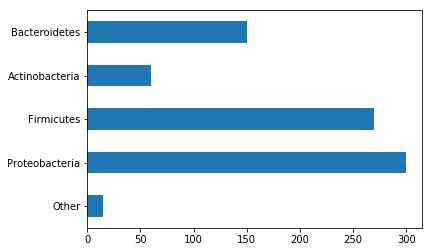

In [21]:
taxon_summary.plot(kind='barh')

Mô tả các trục và đặt tên hình vẽ

Text(0.5, 1.02, 'Số lượng các vi khuẩn')

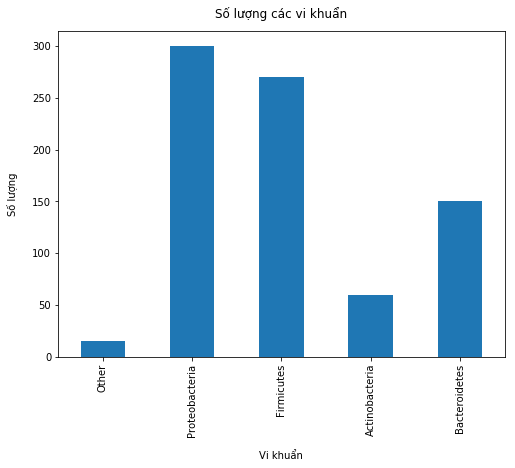

In [22]:
taxon_summary.plot(kind='bar', figsize=(8, 6))
plt.xlabel("Vi khuẩn", labelpad=14)
plt.ylabel("Số lượng", labelpad=14)
plt.title("Số lượng các vi khuẩn", y=1.02)

Text(0.5, 1.02, 'Số lượng các vi khuẩn')

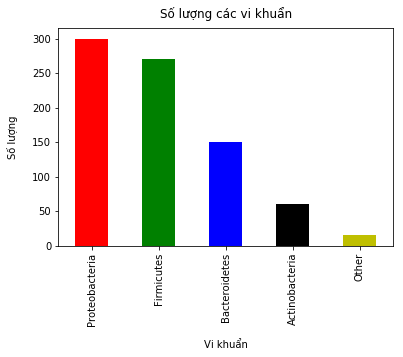

In [23]:
import seaborn as sns
mycolors = 'rgbkymc'  #red, green, blue, black, etc.
taxon_pareto.plot(kind = 'bar',  color=list(mycolors))
plt.xlabel("Vi khuẩn", labelpad=14)
plt.ylabel("Số lượng", labelpad=14)
plt.title("Số lượng các vi khuẩn", y=1.02)
